# Data Science 01

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Soccer

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [10]:
df = pd.read_csv('data.csv')
print(df)

       Unnamed: 0      ID  ... GKReflexes  Release Clause
0               0  158023  ...        8.0         €226.5M
1               1   20801  ...       11.0         €127.1M
2               2  190871  ...       11.0         €228.1M
3               3  193080  ...       94.0         €138.6M
4               4  192985  ...       13.0         €196.4M
...           ...     ...  ...        ...             ...
18202       18202  238813  ...        9.0           €143K
18203       18203  243165  ...       12.0           €113K
18204       18204  241638  ...       13.0           €165K
18205       18205  246268  ...        9.0           €143K
18206       18206  246269  ...        9.0           €165K

[18207 rows x 89 columns]


In [12]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [28]:
df1 = pd.DataFrame(df, columns=['Name', 'Wage', 'Value'])

In [22]:
df1.head()

,Name,Wage,Value
0,L. Messi,€565K,€110.5M
1,Cristiano Ronaldo,€405K,€77M
2,Neymar Jr,€290K,€118.5M
3,De Gea,€260K,€72M
4,K. De Bruyne,€355K,€102M


In [29]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

df1['Wage'] = df1['Wage'].replace('[\€]', '', regex=True).apply(value_to_float)
df1['Value'] = df1['Value'].replace('[\€]', '', regex=True).apply(value_to_float)
df1['difference'] = df1['Value'] - df1['Wage']

In [30]:
df1 = df1.sort_values('difference', ascending=False)

In [31]:
df1

,Name,Wage,Value,difference
2,Neymar Jr,290000.0,118500000.0,118210000.0
0,L. Messi,565000.0,110500000.0,109935000.0
4,K. De Bruyne,355000.0,102000000.0,101645000.0
5,E. Hazard,340000.0,93000000.0,92660000.0
15,P. Dybala,205000.0,89000000.0,88795000.0
...,...,...,...,...
17752,S. Phillips,1000.0,0.0,-1000.0
12192,H. Sulaimani,3000.0,0.0,-3000.0
3550,S. Nakamura,4000.0,0.0,-4000.0
4228,B. Nivet,5000.0,0.0,-5000.0


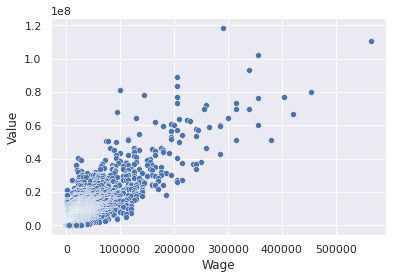

In [32]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Wage', y='Value', data=df1)
graph

In [40]:
from bokeh.plotting import figure, show
from bokeh.models import HoverTool

TOOLTIPS = HoverTool(tooltips=[
  ('index', '$index'),
  ('(Wage, Value)', '(@Wage, @Value)'),
  ('Name', '$Name')
])
p = figure(title='FIFA 19', x_axis_label='Wage', y_axis_label='Value', plot_width=700, plot_height=700, tools=[TOOLTIPS])
p.circle('Wage', 'Value', size=10, source=df1)
show(p)